In [1]:
from dbfread import DBF
import pandas as pd
from pandas import *
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
# import plotly.plotly as py
# import plotly.graph_objs as go

In [2]:
load_ext watermark

ModuleNotFoundError: No module named 'watermark'

In [ ]:
watermark -v -m -p numpy,pandas

# Notebook 4
**In this notebook, we are going to explore some of the non human-factors that lead to accidents and fatal death.**

Load 10 years of accident data from the saved data on Notebook2

In [3]:
accidents = pd.read_hdf('results/accidents.h5', 'accidents')
vehicles = pd.read_hdf('results/vehicles.h5', 'vehicles')
person = pd.read_hdf('results/person.h5','person')
fatal_crashs = pd.merge(vehicles, accidents, left_index=True, right_index=True, how='inner',on=('STATE', 'YEAR','CASE_NUM'))
fatal_crashs_all = pd.merge(fatal_crashs, person, how='inner',on=('STATE', 'YEAR','CASE_NUM'))

In [4]:
fatal_crashs_all.head()

,STATE,YEAR,CASE_NUM,SPEED,ROLLOVER,FIRE,BODY_TYP,DEATHS,DRINKING_INDICATOR,NUM_VEHICLE,...,LATITUDE,LONGITUD,COLLISION_TYPE,LIGHT_CONDITION,WEATHER,CRASH_FACTOR,DRUNK_DRIVE,AGE,SEX,RACE
0,10,2007,100001,99.0,0.0,0.0,Sedan,1.0,0.0,1.0,...,38.645422,-75.210097,Not Collision,Dark,Clear,0.0,0.0,16.0,1.0,1.0
1,10,2007,100002,50.0,0.0,0.0,Sedan,0.0,0.0,2.0,...,38.973942,-75.452531,Not Collision,Dark,Clear,0.0,0.0,27.0,2.0,78.0
2,10,2007,100002,50.0,0.0,0.0,Sedan,0.0,0.0,2.0,...,38.973942,-75.452531,Not Collision,Dark,Clear,0.0,0.0,42.0,1.0,0.0
3,10,2007,100002,50.0,0.0,0.0,Sedan,0.0,0.0,2.0,...,38.973942,-75.452531,Not Collision,Dark,Clear,0.0,0.0,62.0,1.0,0.0
4,10,2007,100002,50.0,0.0,0.0,Truck,0.0,0.0,2.0,...,38.973942,-75.452531,Not Collision,Dark,Clear,0.0,0.0,27.0,2.0,78.0


# Weather

** one of the most important contributing factor to accidetn is weather.**
**we want to explore the proportion of eahc weather condition that leads to accident.**


In [5]:
accident_weather = fatal_crashs.groupby("WEATHER")["WEATHER"].count().reset_index(name="count").sort_values("count", ascending = False )
accident_weather = accident_weather.reset_index(drop=True)
accident_weather = accident_weather.rename(columns={"count" : "num of accident"})

In [6]:
accident_weather

,WEATHER,num of accident
0,Clear,372379
1,Cloudy,50367
2,Rain,33390
3,Snow,8207
4,"Fog, Smog, Smoke",5627
5,Not Reported,2991
6,"Sleet,Hail",1851
7,Unkown,1371
8,Severe Crosswinds,724
9,other,534


In [7]:
    #accident_weather["Code Meaning"] = accident_weather['WEATHER'].map({0.0:'Normal',1.0:'Clear',2.0:'Rain', 3.0: 'Sleet,Hail', 4.0:'Snow', 5.0:'Fog, Smog, Smoke',6.0:'Severe Crosswinds',7.0:'Blowing Sand, Soil, Dirt',8.0:'other',9.0: 'Unknown',10.0:'Cloudy',11.0:'Blowing Snow',12.0:'Freezing Rain or Drizzle',98.0:'Not Reported', 99.0:'Unknown' })

In [8]:
#accident_weather.head()

let's generate a boxplot to visulizaize how many accident happens under each weather condition

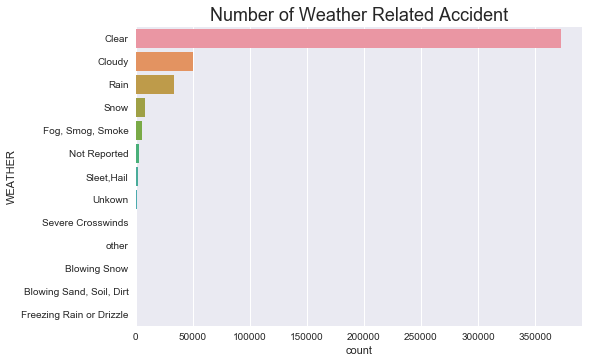

In [9]:
sns.barplot(y = 'WEATHER', x = 'num of accident', data = accident_weather)
plt.title("Number of Weather Related Accident", fontsize=18)
plt.xlabel("count")
plt.show()

In [10]:
weather_death = fatal_crashs_all.groupby(["WEATHER"])["DEATHS"].count().reset_index(name="count").sort_values("count", ascending = False )
weather_death = weather_death.reset_index(drop=True)
weather_death = weather_death.rename(columns={"count" : "num of death"})
weather_death

,WEATHER,num of death
0,Clear,1109358
1,Cloudy,145449
2,Rain,102098
3,Snow,62893
4,"Fog, Smog, Smoke",33098
5,Not Reported,8140
6,"Sleet,Hail",7833
7,Blowing Snow,4778
8,Severe Crosswinds,2897
9,"Blowing Sand, Soil, Dirt",2816


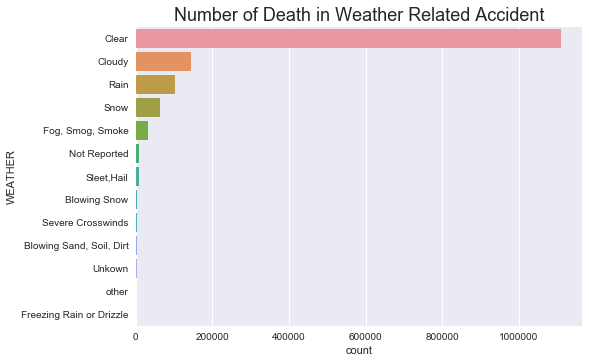

In [11]:
sns.barplot(y = 'WEATHER', x = 'num of death', data = weather_death)
plt.title("Number of Death in Weather Related Accident", fontsize=18)
plt.xlabel("count")
plt.show()

In [12]:
New_York_Weather = fatal_crashs_all[fatal_crashs_all.STATE == 36].groupby(["WEATHER"])["DEATHS"].count().reset_index(name="count").sort_values("count", ascending = False )
New_York_Weather
# New_York_Weather['count'].sum()
# New_York_Weather.at[5,'count']/New_York_Weather['count'].sum()
# New_York_Weather.get_value(5,'count')
# ((New_York_Weather['count'].sum()-New_York_Weather.at[5,'count']-New_York_Weather.at[7,'count'])/New_York_Weather['count'].sum())

,WEATHER,count
0,Clear,35436
1,Cloudy,7215
5,Rain,3287
7,Snow,1594
6,"Sleet,Hail",350
2,"Fog, Smog, Smoke",326
8,Unkown,76
4,Not Reported,54
3,Freezing Rain or Drizzle,9
9,other,2


In [39]:
# Snow_accident_ratio = 0.03296862396326708
# Rain_accident_ratio = 0.067984860079836187
# Other_accident_ratio = 1-0.03296862396326708-0.067984860079836187
Fatal_Accident_Ratio = [New_York_Weather.at[7,'count'],New_York_Weather.at[5,'count'],New_York_Weather['count'].sum()-New_York_Weather.at[5,'count']-New_York_Weather.at[7,'count']]
Annual_Average = [11.1,121,(365-11.1-121)]
import scipy as sp
data = {'Fatal_Accident_Ratio':[New_York_Weather.at[7,'count'],New_York_Weather.at[5,'count'],New_York_Weather['count'].sum()-New_York_Weather.at[5,'count']-New_York_Weather.at[7,'count']],
        'Annual_Average':[11.1,121,(365-11.1-121)]}
indexes = ['Snow','Rain','Clear and Other']
Chi_weathers=pd.DataFrame(data,index=indexes)
Chi_weathers.head()

,Annual_Average,Fatal_Accident_Ratio
Snow,11.1,1594
Rain,121.0,3287
Clear and Other,232.9,43468


In [40]:
observed = Chi_weathers['Fatal_Accident_Ratio']

expected = Chi_weathers['Annual_Average']   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

8334645.862982081


In [14]:
weather_per_death = accident_weather.merge(weather_death,left_on='WEATHER', right_on='WEATHER', how='outer')
weather_per_death["death per accident ratio"] = weather_death["num of death"]/weather_per_death["num of accident"]
weather_per_death

,WEATHER,num of accident,num of death,death per accident ratio
0,Clear,372379,1109358,2.979110
1,Cloudy,50367,145449,2.887784
2,Rain,33390,102098,3.057742
3,Snow,8207,62893,7.663336
4,"Fog, Smog, Smoke",5627,33098,5.881998
5,Not Reported,2991,8140,2.721498
6,"Sleet,Hail",1851,7833,4.231767
7,Unkown,1371,2804,3.485047
8,Severe Crosswinds,724,2897,4.001381
9,other,534,1355,5.273408


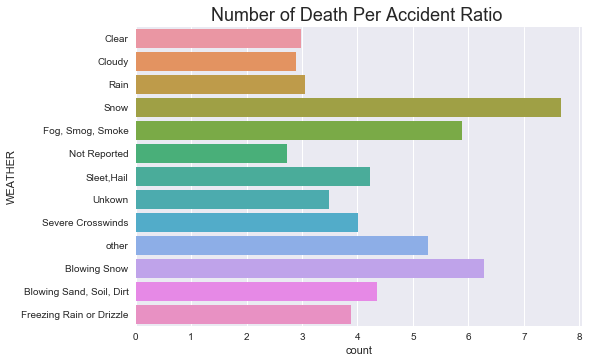

In [15]:
sns.barplot(y = 'WEATHER', x = "death per accident ratio", data = weather_per_death)
plt.title("Number of Death Per Accident Ratio ", fontsize=18)
plt.xlabel("count")
plt.show()


In [16]:
#  a function hide any percentage that is less than 1 percent
def my_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 1 else ''

# hide any label with percentage that is less than 1 percent
label = []
summ = sum(accident_weather['num of accident'])
length = len(accident_weather['num of accident'])

for i in range(length):
    if accident_weather['num of accident'][i]/summ >= 0.01:
        label.append(accident_weather['WEATHER'][i])
    else:
        label.append('')

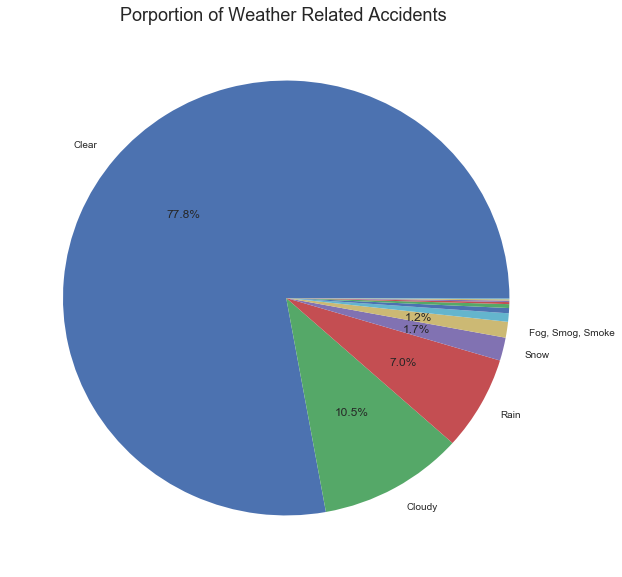

In [17]:
#this is much a better plot than the previous one
# i will only show the percentage of weather that are relatively high
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
ax.pie(accident_weather['num of accident'],labels = label,autopct= my_autopct)
plt.title("Porportion of Weather Related Accidents ", fontsize=18)
plt.show()

**let's generate a heatmap with a few selected variable with respect to time**

In [18]:
accident_weather =  fatal_crashs_all.groupby(['YEAR', 'WEATHER'])['WEATHER'].count().reset_index(name = "count")

In [19]:
#reshpae the table to a better format
accident_weather_pivoted = accident_weather.pivot(index = "YEAR", columns="WEATHER", values='count')
accident_weather_pivoted = accident_weather_pivoted.fillna(0)

#selected column with most accidently causing variable
accident_weather_pivoted = accident_weather_pivoted[["Clear","Cloudy","Fog, Smog, Smoke","Rain","Snow"]]
accident_weather_pivoted.head()

WEATHER,Clear,Cloudy,"Fog, Smog, Smoke",Rain,Snow
YEAR,,,,,
2007,160513.0,0.0,15450.0,12705.0,7572.0
2008,132244.0,0.0,3766.0,10524.0,7233.0
2009,116971.0,0.0,1284.0,11459.0,3933.0
2010,99257.0,17101.0,1365.0,9063.0,2731.0
2011,95428.0,17515.0,2027.0,9318.0,2123.0


In [20]:
def get_row_value(df):
    temp=[]
    for row in df.iterrows():
        index, data = row
        temp.append(data.tolist())
    return temp

In [21]:
row_value = get_row_value(accident_weather_pivoted)

In [22]:
column_name = list(accident_weather_pivoted.columns.values)

In [23]:
column_name

['Clear', 'Cloudy', 'Fog, Smog, Smoke', 'Rain', 'Snow']

In [24]:
year = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

In [25]:
#use ploty to generate heatmap
trace = go.Heatmap(z= row_value,
                   x= column_name,
                   y= year)
data=[trace]
py.iplot(data)

NameError: name 'go' is not defined

# Light Condtion

In [ ]:
light_accident = fatal_crashs_all.groupby("LIGHT_CONDITION")["LIGHT_CONDITION"].count().reset_index(name="count").sort_values("count", ascending = False )
light_accident = light_accident.reset_index(drop=True)
light_accident.head()

In [ ]:
sns.barplot(x = 'LIGHT_CONDITION', y = 'count', data = light_accident)
plt.title("Accident under Light Condition ", fontsize=18)
plt.xlabel("count")
plt.show()

In [ ]:
light_death = fatal_crashs_all.groupby(["LIGHT_CONDITION"])["DEATHS"].count().reset_index(name="count").sort_values("count", ascending = False )
light_death = light_death.reset_index(drop=True)
light_death = light_death.rename(columns={"count" : "num of death"})
light_death

In [ ]:
light_per_death = light_accident.merge(light_death,left_on='LIGHT_CONDITION', right_on='LIGHT_CONDITION', how='outer')
light_per_death
#weather_per_death["death per accident ratio"] = weather_death["num of death"]/weather_per_death["num of accident"]
#weather_per_death

# Intersection 

**we will explore  how different intersections leads to traffic accidents. **

**Since this data has only been recorded since 2009, we need to create a new data frame from 2010 to 2016.**

In [ ]:
dbf10= DBF('data/accident/accident2010.dbf')
dbf11 = DBF('data/accident/accident2011.dbf')
dbf12 = DBF('data/accident/accident2012.dbf')
dbf13 = DBF('data/accident/accident2013.dbf')
dbf14 = DBF('data/accident/accident2014.dbf')
dbf15 = DBF('data/accident/accident2015.dbf')
dbf16 = DBF('data/accident/accident2016.dbf')
accidents10 = DataFrame(iter(dbf10))
accidents11 = DataFrame(iter(dbf11))
accidents12 = DataFrame(iter(dbf12))
accidents13 = DataFrame(iter(dbf13))
accidents14 = DataFrame(iter(dbf14))
accidents15 = DataFrame(iter(dbf15))
accidents16 = DataFrame(iter(dbf16))

In [ ]:
accidents_intersect = pd.concat([accidents10,accidents11,accidents12,accidents13,accidents14,accidents15,accidents16], axis=0,join='inner')

In [ ]:
accidents_intersect['TYP_INT'] = accidents_intersect['TYP_INT'].map({1:'Not an Intersection',2:'Four-Way Intersection',3:'T-Intersection',4:'Y-Intersection',5:'Traffic Circle',6:'Roundabout',7:"Five-Point, or More",10:"L-Intersection",98:"Not Reported",99:"Unknown"})

In [ ]:
accidents_intersect.head()

In [ ]:
accidents_intersect_count = accidents_intersect.groupby("TYP_INT")["TYP_INT"].count().reset_index(name="count").sort_values("count", ascending = False )
accidents_intersect_count = accidents_intersect_count.reset_index(drop=True)
accidents_intersect_count.head()

In [ ]:
sns.barplot(data = accidents_intersect_count, y = 'TYP_INT', x = 'count')
plt.xlabel("count")
plt.ylabel("Type of Intersection")
plt.title('Type of Intersection vs. Accidents, 2010-2016', fontsize = 20)
plt.show()

Using Bokeh, I am going to create some visualizations to see what patterns are associated with fatal aircraft accidents. I am going to take a subset of the data with some features I think would yield intersting results, while also keeping in mind how these trends may be changing over time.

In [ ]:
accidents_intersect.groupby("TYP_INT")["TYP_INT"].count().reset_index(name="count").sort_values("count", ascending = False )

In [ ]:
fatal_crashs_all.head()

In [ ]:
# df_normalized2 = accident_weather_pivoted.div(accident_weather_pivoted.sum(axis=1), axis=0)